In [148]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans

In [149]:
df=pd.read_csv('wine_data.csv')
df.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3085,8.0,0.23,0.37,9.6,0.054,23.0,159.0,0.99795,3.32,0.47,9.8,4
7482,6.6,0.32,0.33,2.5,0.052,40.0,210.0,0.99316,3.15,0.60,10.0,5
19583,8.5,1.19,1.20,54.5,0.190,186.0,323.1,1.02906,2.92,1.66,13.4,9
18088,10.7,1.37,1.24,57.2,0.285,130.7,369.0,1.02093,2.86,1.20,10.6,9
9617,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [151]:
df['quality'].value_counts()

quality
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64

In [152]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


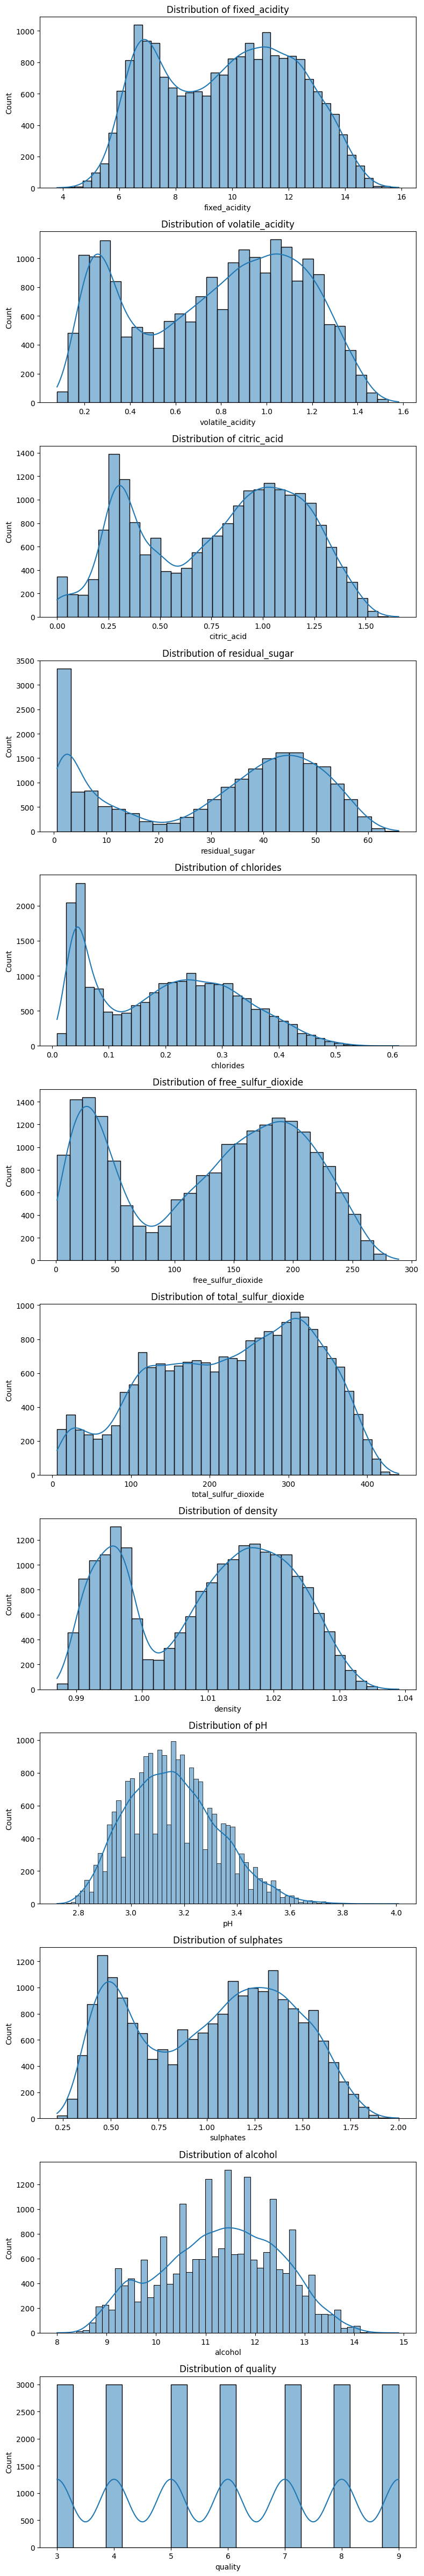

In [153]:
# Create subplots
num_columns = len(df.columns)
fig, axes = plt.subplots(nrows=num_columns, figsize=(8, 4 * num_columns))

# Plot each column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
    

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'fixed_acidity'),
  Text(1, 0, 'volatile_acidity'),
  Text(2, 0, 'citric_acid'),
  Text(3, 0, 'residual_sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free_sulfur_dioxide'),
  Text(6, 0, 'total_sulfur_dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality')])

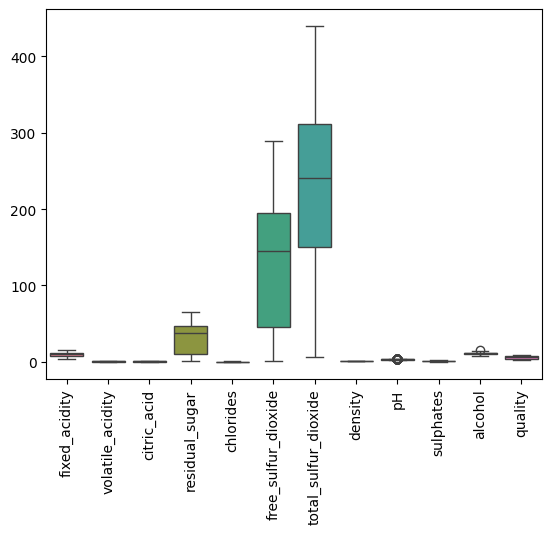

In [154]:
sns.boxplot(data=df) 
plt.xticks(rotation=90)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer


In [156]:
x=df.iloc[:,:-1]
y=df['quality']

In [157]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16800, 11), (4200, 11), (16800, 1), (4200, 1))

# ORIGINAL PLAN FOR THE MODEL
Since the features are not in Normal(Gaussian) distribution and also not in scale, we will use Yeo Johnson transformer.
Also we will transform the dependant variable(y) into binary values.
Finally we will be using LogisticRegresssion model.
Accuracy score : 0.714

In [158]:
trf_x= ColumnTransformer(transformers=[('trf1',PowerTransformer(),[0,1,2,3,4,5,6,7,8,9,10]),
                               ('trf2',KBinsDiscretizer(n_bins=10,strategy='quantile'),[0,1,2,3,4,5,6,7,8,9,10]),
                               ],remainder='passthrough')
trf_y=ColumnTransformer(transformers=[('trf_test',Binarizer(threshold=7),[0])])


In [159]:
x_train_trf=trf_x.fit_transform(x_train)
y_train_trf=trf_y.fit_transform(y_train)
x_test_trf=trf_x.transform(x_test)
y_test_trf=trf_y.transform(y_test)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train_trf,y_train_trf)
y_pred=model.predict(x_test_trf)

# Original FINAL RESULT

In [161]:
print("accuracy of model ",accuracy_score(y_test_trf,y_pred))

accuracy of model  0.714047619047619


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#37644A;overflow:hidden;background-color:#37644A"><b></b> <b>Vanaf hier de aanpassingen</b></div>



# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#37644A;overflow:hidden;background-color:#37644A"><b></b> <b>1. Analyse bovenstaand model</b></div>



Het resultaat van het bovenstaande model bekijken door een confusion matrix te maken.

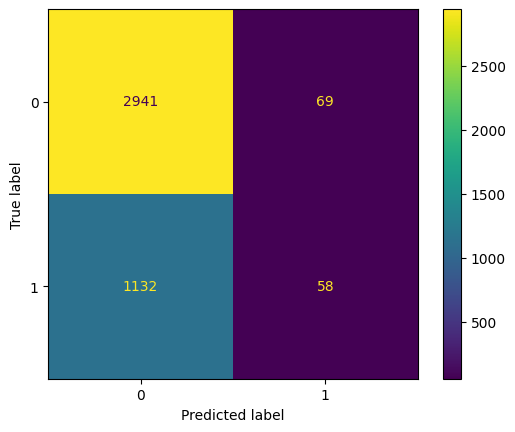

In [162]:
cm = confusion_matrix(y_test_trf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Als het model voorspelt dat de wijn goed is, is dat vaker niet dan wel zo. Ook wordt het grootste deel van de goede wijnen als slecht bestempeld. Daar hebben we dus niet zoveel aan.
Laten we een correlatiematrix maken om te zien welke factoren invloed hebben op de kwaliteit van de wijn.

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#37644A;overflow:hidden;background-color:#37644A"><b></b> <b>2. Data exploratie</b></div>



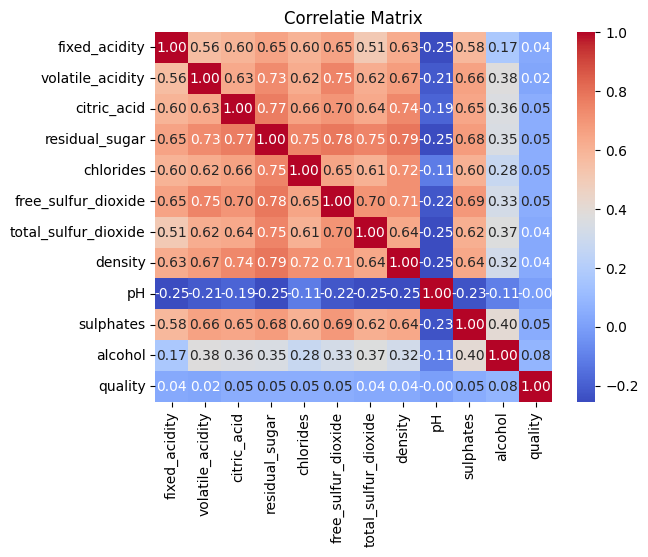

In [163]:
corr_matrix = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].corr()

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlatie Matrix')
plt.show()

De correlatie met de kwaliteit is voor alle gemeten parameters heel klein.
Om meer inzicht te krijgen in de data: uitzetten van de gemiddelde waarde van elke parameter 
tegen de wijnkwaliteit. 

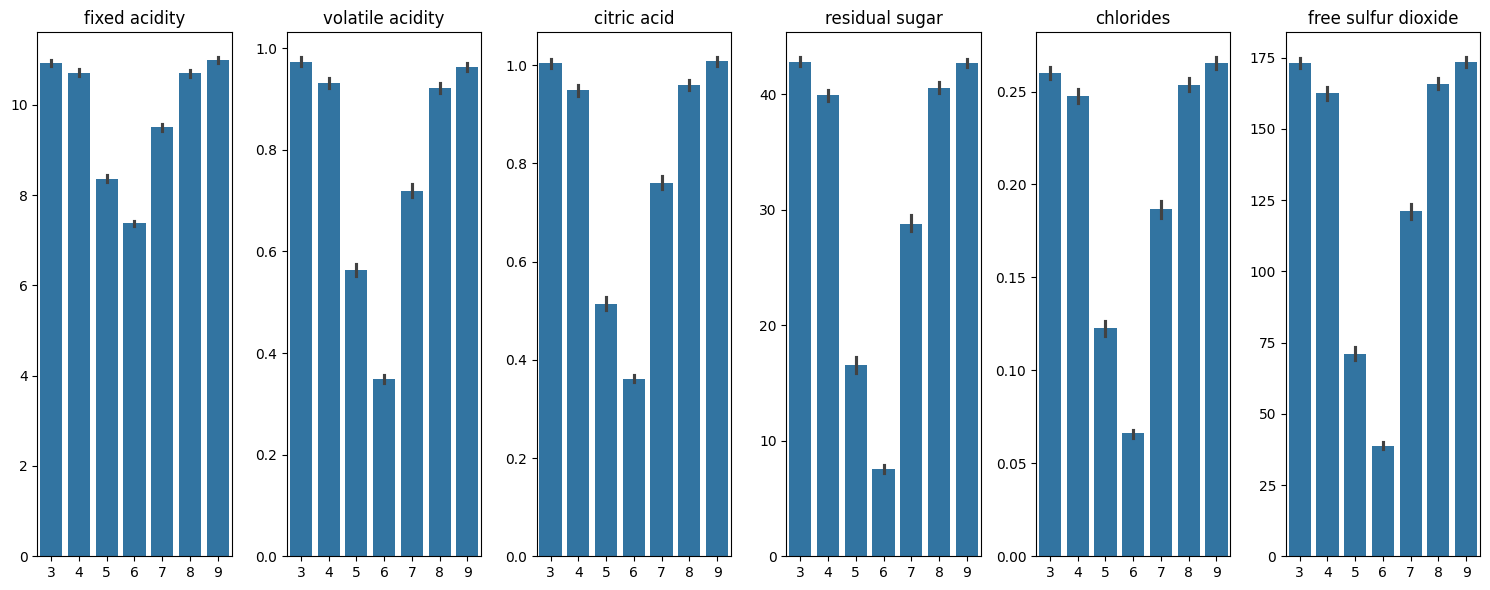

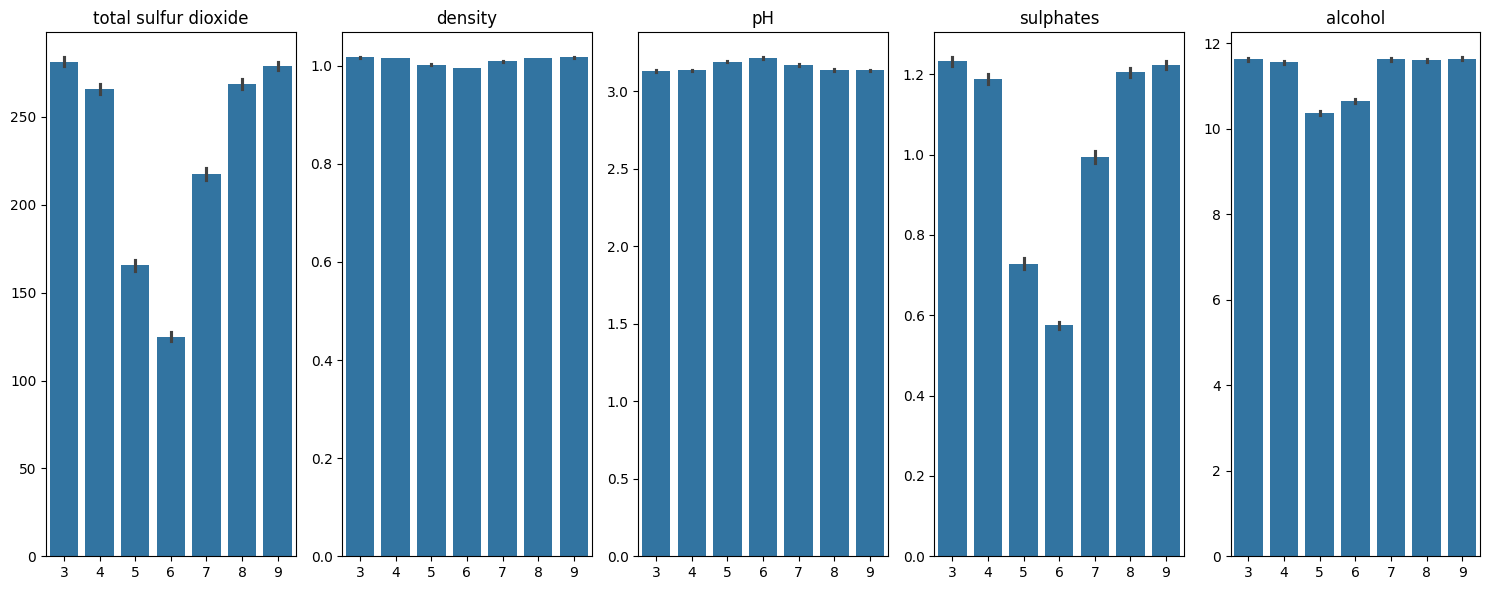

In [164]:
index = 0
nums = df.columns[:-1]
for k in [6, 5]:
    fig, axes = plt.subplots(ncols=k, figsize=(15, 6))

    for i in range(k):
        sns.barplot(df, y=nums[index] ,x=df.columns[-1], ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_title(nums[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

Het blijkt dat de parameters hetzelfde zijn voor goede en slechte wijn. Alleen middelmatige wijn kan eruit gehaald worden op basis van deze parameters.

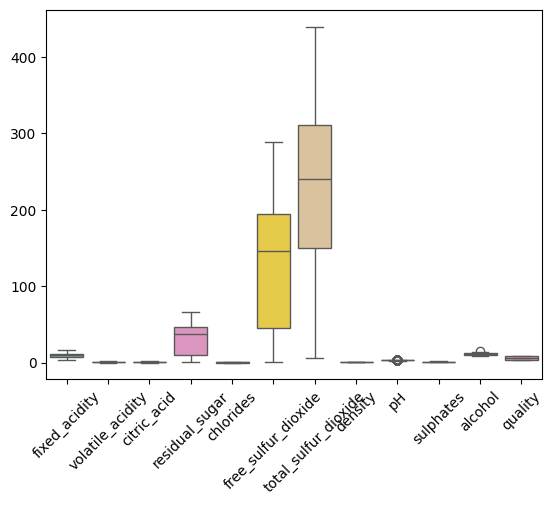

In [165]:
#data nader bekijken met boxplot maken
ax = sns.boxplot(data=df, palette='Set2')
plt.xticks(rotation=45)

plt.show()

In [166]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [167]:
x=df.drop(columns='quality', axis =1).copy()
y=df['quality'].copy()

In [168]:
x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [169]:
# de schalen van de data zijn verschillend, dus standaardiseren en log nemen van pH
from sklearn.preprocessing import StandardScaler
x = df.drop(columns='quality', axis=1).copy()
y = df['quality'].copy()

x['log_pH'] = np.log(x['pH'])
x.drop('pH', axis=1, inplace=True)

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


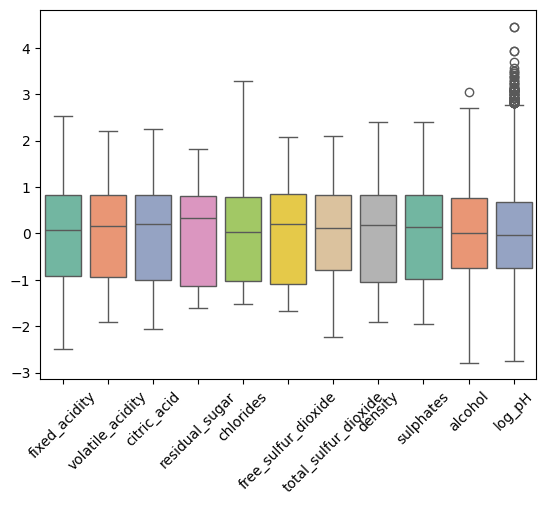

In [170]:
#data nader bekijken met boxplot maken
ax = sns.boxplot(data=df_x_scaled, palette='Set2')
plt.xticks(rotation=45)

plt.show()

Misschien zijn er verborgen verschillen, door de bimodaliteit van de verdeling van de features. 
Daarom maak ik een selectie van de features tabel met kwaliteit 3 en 9 en vergelijk de feature waarden voor deze twee.

In [171]:
df_x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
df_x_scaled = df_x_scaled.reset_index(drop=True)
y = y.reset_index(drop=True)

qual_3a = df_x_scaled[y == 3]
qual_9a = df_x_scaled[y == 9]


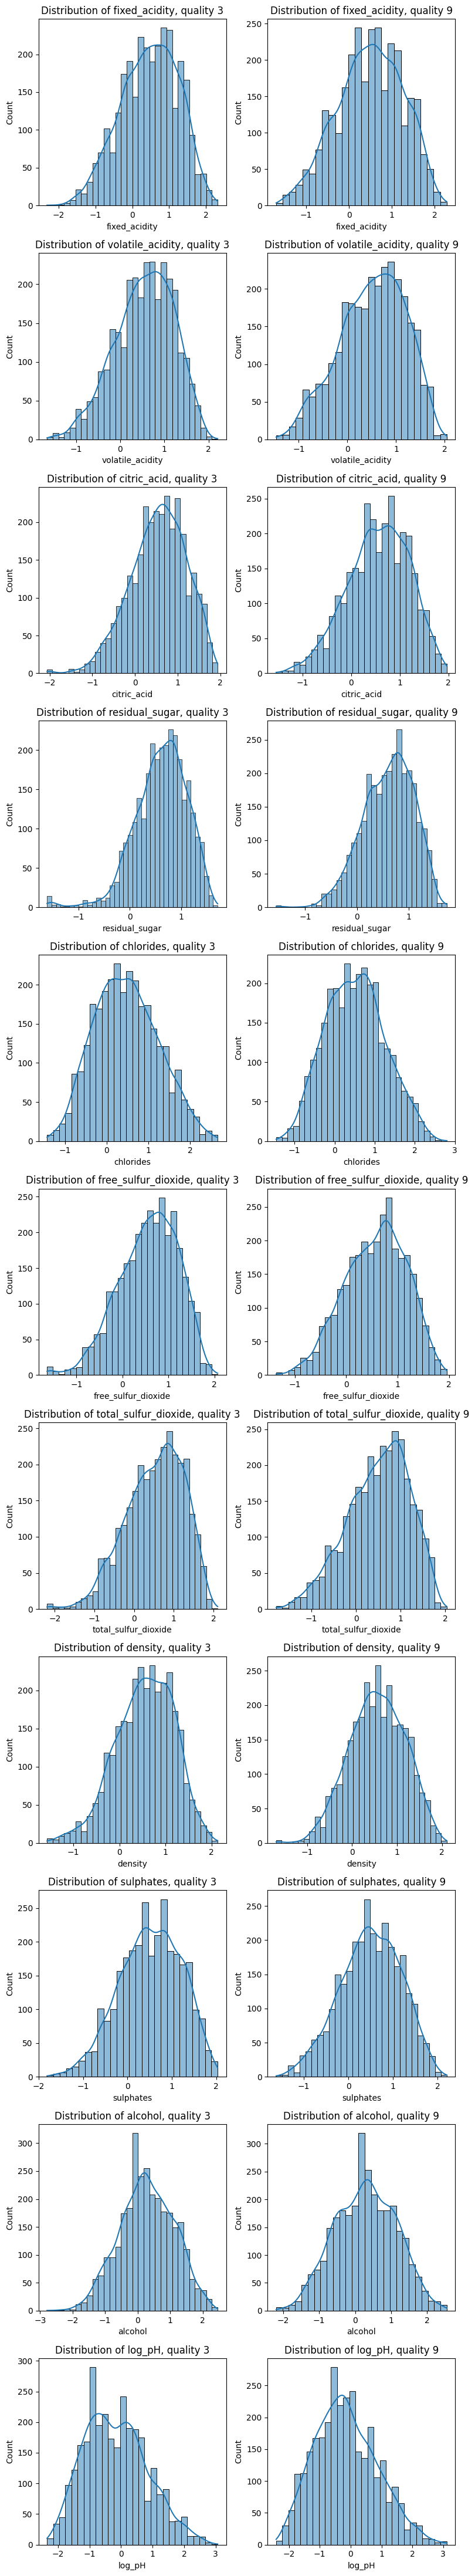

In [172]:
# Create subplots
num_columns = len(qual_3a.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(8, 4 * num_columns))

# Plot each column
for i, col in enumerate(qual_3a.columns):
    sns.histplot(qual_3a[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f'Distribution of {col}, quality 3')
    sns.histplot(qual_9a[col], kde=True, ax=axes[i,1])
    axes[i,1].set_title(f'Distribution of {col}, quality 9')

plt.tight_layout()
plt.show()
    

Conclusie : de features zijn nagenoeg hetzelfde in wijn met kwaliteit 3 en kwaliteit 9. De data kunnen daarom
niet gebruikt worden om onderscheid te maken tussen goede en slechte wijn.
Wel moet het mogelijk zijn om wijn met middelmatige kwaliteit (5,6,7) te onderscheiden. Laten we dat proberen.

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#37644A;overflow:hidden;background-color:#37644A"><b></b> <b>3. Modellen</b></div>



In [173]:
dfmm = df.copy()


In [174]:
x=dfmm.drop(columns='quality', axis =1).copy()
y=dfmm['quality'].copy()

In [175]:
#afsplitsen trainings- en testset
x_train_temp,x_test,y_train_temp,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
y_train_temp = y_train_temp.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

#afsplitsen validatieset van de trainingsset
x_train,x_validate,y_train,y_validate= train_test_split(x_train_temp,y_train_temp,test_size=0.1,random_state=0)
y_train = y_train.reshape(-1, 1)
y_validate = y_validate.reshape(-1, 1)
x_train.shape, x_validate.shape, x_test.shape, y_train.shape, y_validate.shape, y_test.shape

((15120, 11), (1680, 11), (4200, 11), (15120, 1), (1680, 1), (4200, 1))

In [176]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Custom binarizer y-labels: 5,6,7 = 1; 3,4,8,9 = 0
def custom_binarizer(y):
    return np.where(np.isin(y, [5, 6, 7]), 1, 0)

log_transformer = FunctionTransformer(np.log1p, validate=True)

trf_x= ColumnTransformer(transformers=[('trf1',log_transformer,['pH']),
                               ('trf2', StandardScaler(), [0,1,2,3,4,5,6,7,8,9,10])
                               ],remainder='passthrough')
trf_y = ColumnTransformer(transformers=[('trf_bin', FunctionTransformer(custom_binarizer), [0])])


In [177]:
x_train_trf=trf_x.fit_transform(x_train)
y_train_trf=trf_y.fit_transform(y_train)
x_test_trf=trf_x.transform(x_test)
y_test_trf=trf_y.transform(y_test)
x_validate_trf=trf_x.transform(x_validate)
y_validate_trf=trf_y.transform(y_validate)

Validation Accuracy: 0.8512
Validation f1-score: 0.7987
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       963
           1       0.94      0.69      0.80       717

    accuracy                           0.85      1680
   macro avg       0.88      0.83      0.84      1680
weighted avg       0.87      0.85      0.85      1680



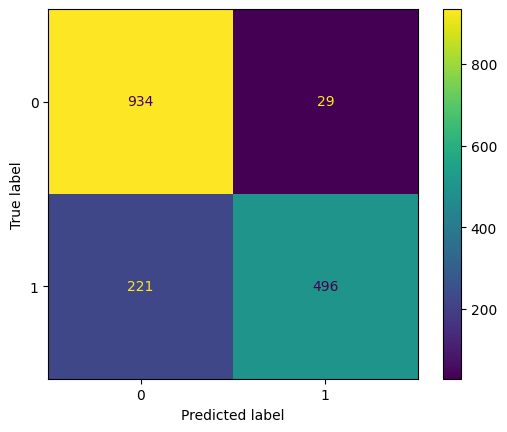

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
model=LogisticRegression()
model.fit(x_train_trf,y_train_trf)
y_pred=model.predict(x_validate_trf)
accuracy_lg = accuracy_score(y_validate_trf, y_pred)
f1_lg = f1_score(y_validate_trf, y_pred)
print(f"Validation Accuracy: {accuracy_lg:.4f}")
print(f"Validation f1-score: {f1_lg:.4f}")
print(classification_report(y_validate_trf, y_pred))
cm = confusion_matrix(y_validate_trf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Een redelijk resultaat. Kijken of GridSearch verbetering geeft.

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2'],        
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced'] }

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='f1',
    cv=5
    )

grid_search.fit(x_train_trf, y_train_trf)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Train final model with best parameters
best_model = grid_search.best_estimator_

# Predict on validation set
y_pred = best_model.predict(x_validate_trf)

# Results
accuracy_lg = accuracy_score(y_validate_trf, y_pred)
f1_lg = f1_score(y_validate_trf, y_pred)
print(f"Validation Accuracy: {accuracy_lg:.4f}")
print(f"Validation f1-score: {f1_lg:.4f}")
print(classification_report(y_validate_trf, y_pred))



Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.779816222234208
Validation Accuracy: 0.8506
Validation f1-score: 0.7977
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       963
           1       0.94      0.69      0.80       717

    accuracy                           0.85      1680
   macro avg       0.88      0.83      0.84      1680
weighted avg       0.87      0.85      0.85      1680



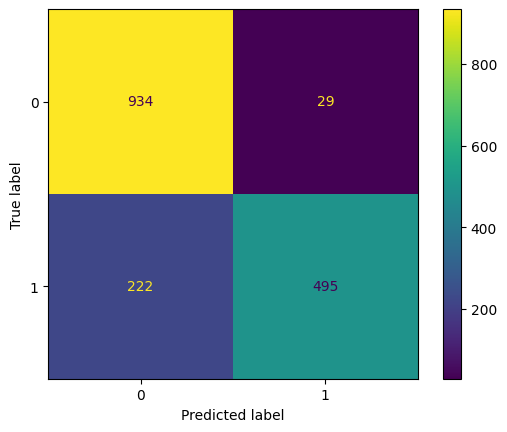

In [181]:
cm = confusion_matrix(y_validate_trf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

GridSearch levert geen beter resultaat en de optimale C-waarde is 0.01, dus er is nauwelijks iets veranderd aan het algoritme.

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, fbeta_score, r2_score, confusion_matrix
from contextlib import redirect_stdout
import logging
import warnings
from tqdm import tqdm
from scipy.stats import zscore
import optuna

In [184]:
def objective(trial, model_name):
    if model_name == 'KNN':
        n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        p = trial.suggest_int('p', 1, 2)
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
    
    elif model_name == 'DecisionTree':
        max_depth = trial.suggest_int('max_depth', 2, 32)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    
    elif model_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    
    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    
    else:
        raise ValueError("Incompatibility Error")
    
   
    with open(os.devnull, 'w') as fnull:
        with redirect_stdout(fnull):
            # Treinar o modelo
            model.fit(x_train_trf, y_train_trf)
            
            # Fazer previsões
            y_pred = model.predict(x_validate_trf)
    
    accuracy = accuracy_score(y_validate_trf, y_pred)
    
    return accuracy

In [185]:
models = ['KNN', 'DecisionTree', 'RandomForest', 'XGBoost']
best_params = {}

In [186]:
for model_name in models:
    study = optuna.create_study(direction='maximize')    
    with tqdm(total=50, desc=f'Optimization... {model_name}', dynamic_ncols=True) as pbar:
        def callback(study, trial):
            pbar.update(1) 
        
        
        study.optimize(lambda trial: objective(trial, model_name), n_trials=50, callbacks=[callback])
    best_params[model_name] = study.best_params
    
    print(f"Best parameters for {model_name}: {study.best_params}")
    print(f"Best accuracy for {model_name}: {study.best_value}\n")

print("Best parameters for all models:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

[I 2025-02-17 21:52:08,777] A new study created in memory with name: no-name-d13948cf-906d-4439-8d68-0e8ca816ab55
Optimization... KNN: 100%|██████████| 50/50 [00:08<00:00,  5.89it/s]
[I 2025-02-17 21:52:17,273] A new study created in memory with name: no-name-3e08e71e-ccd2-4188-a49d-1853e0f4ae5e


Best parameters for KNN: {'n_neighbors': 20, 'weights': 'distance', 'p': 2}
Best accuracy for KNN: 0.8898809523809523



Optimization... DecisionTree:   0%|          | 0/50 [00:00<?, ?it/s][I 2025-02-17 21:52:17,308] Trial 0 finished with value: 0.8488095238095238 and parameters: {'max_depth': 3, 'min_samples_split': 6}. Best is trial 0 with value: 0.8488095238095238.
[I 2025-02-17 21:52:17,338] Trial 1 finished with value: 0.8482142857142857 and parameters: {'max_depth': 4, 'min_samples_split': 7}. Best is trial 0 with value: 0.8488095238095238.
[I 2025-02-17 21:52:17,487] Trial 2 finished with value: 0.8327380952380953 and parameters: {'max_depth': 20, 'min_samples_split': 10}. Best is trial 0 with value: 0.8488095238095238.
Optimization... DecisionTree:   6%|▌         | 3/50 [00:00<00:03, 14.06it/s][I 2025-02-17 21:52:17,638] Trial 3 finished with value: 0.830952380952381 and parameters: {'max_depth': 21, 'min_samples_split': 10}. Best is trial 0 with value: 0.8488095238095238.
[I 2025-02-17 21:52:17,821] Trial 4 finished with value: 0.8273809523809523 and parameters: {'max_depth': 31, 'min_samples_sp

Best parameters for DecisionTree: {'max_depth': 9, 'min_samples_split': 2}
Best accuracy for DecisionTree: 0.8505952380952381



Optimization... RandomForest:  36%|███▌      | 18/50 [00:48<01:36,  3.01s/it][I 2025-02-17 21:53:11,197] Trial 18 finished with value: 0.85 and parameters: {'n_estimators': 20, 'max_depth': 2, 'min_samples_split': 3}. Best is trial 11 with value: 0.8922619047619048.
[I 2025-02-17 21:53:14,563] Trial 19 finished with value: 0.8886904761904761 and parameters: {'n_estimators': 118, 'max_depth': 26, 'min_samples_split': 4}. Best is trial 11 with value: 0.8922619047619048.
Optimization... RandomForest: 100%|██████████| 50/50 [02:24<00:00,  2.90s/it]
[I 2025-02-17 21:54:47,034] A new study created in memory with name: no-name-9ab69945-e53b-473a-9d3e-c0082c6cf3dd


Best parameters for RandomForest: {'n_estimators': 138, 'max_depth': 29, 'min_samples_split': 2}
Best accuracy for RandomForest: 0.893452380952381



Optimization... XGBoost:  18%|█▊        | 9/50 [00:05<00:29,  1.41it/s][I 2025-02-17 21:54:52,686] Trial 9 finished with value: 0.8529761904761904 and parameters: {'n_estimators': 77, 'max_depth': 4, 'learning_rate': 0.20814783266415546}. Best is trial 3 with value: 0.8892857142857142.
[I 2025-02-17 21:54:52,856] Trial 10 finished with value: 0.8767857142857143 and parameters: {'n_estimators': 101, 'max_depth': 9, 'learning_rate': 0.10550520738185289}. Best is trial 3 with value: 0.8892857142857142.
Optimization... XGBoost:  30%|███       | 15/50 [00:07<00:17,  2.04it/s][I 2025-02-17 21:54:54,912] Trial 15 finished with value: 0.8636904761904762 and parameters: {'n_estimators': 61, 'max_depth': 7, 'learning_rate': 0.21341987095858672}. Best is trial 12 with value: 0.8904761904761904.
[I 2025-02-17 21:54:56,075] Trial 16 finished with value: 0.8886904761904761 and parameters: {'n_estimators': 180, 'max_depth': 25, 'learning_rate': 0.06733211482962985}. Best is trial 12 with value: 0.890

Best parameters for XGBoost: {'n_estimators': 47, 'max_depth': 21, 'learning_rate': 0.0972829499606849}
Best accuracy for XGBoost: 0.8916666666666667

Best parameters for all models:
KNN: {'n_neighbors': 20, 'weights': 'distance', 'p': 2}
DecisionTree: {'max_depth': 9, 'min_samples_split': 2}
RandomForest: {'n_estimators': 138, 'max_depth': 29, 'min_samples_split': 2}
XGBoost: {'n_estimators': 47, 'max_depth': 21, 'learning_rate': 0.0972829499606849}


In [187]:
models = ['KNN', 'DecisionTree', 'RandomForest', 'XGBoost']
best_params = {}

for model_name in models:
    study = optuna.create_study(direction='maximize')  
    
    study.optimize(lambda trial: objective(trial, model_name), n_trials=50)
    
    best_params[model_name] = study.best_params

    print(f"Beste parameters voor {model_name}: {study.best_params}")
    print(f"Beste accuracy voor {model_name}: {study.best_value}\n")

# Print all best parameters
print("Beste parameters voor alle modellen:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")




[I 2025-02-17 21:55:12,095] A new study created in memory with name: no-name-def60e9d-71d4-4518-876a-69dd366a02ae
[I 2025-02-17 21:55:12,263] Trial 0 finished with value: 0.8625 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.8625.
[I 2025-02-17 21:55:12,419] Trial 1 finished with value: 0.8321428571428572 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.8625.
[I 2025-02-17 21:55:12,537] Trial 2 finished with value: 0.8779761904761905 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 2}. Best is trial 2 with value: 0.8779761904761905.
[I 2025-02-17 21:55:12,712] Trial 3 finished with value: 0.8636904761904762 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 2 with value: 0.8779761904761905.
[I 2025-02-17 21:55:12,836] Trial 4 finished with value: 0.8821428571428571 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 2}. Best is trial 

Beste parameters voor KNN: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}
Beste accuracy voor KNN: 0.8916666666666667



[I 2025-02-17 21:55:23,085] Trial 2 finished with value: 0.8398809523809524 and parameters: {'max_depth': 22, 'min_samples_split': 6}. Best is trial 0 with value: 0.8494047619047619.
[I 2025-02-17 21:55:23,232] Trial 3 finished with value: 0.8422619047619048 and parameters: {'max_depth': 20, 'min_samples_split': 2}. Best is trial 0 with value: 0.8494047619047619.
[I 2025-02-17 21:55:23,264] Trial 4 finished with value: 0.8482142857142857 and parameters: {'max_depth': 5, 'min_samples_split': 7}. Best is trial 0 with value: 0.8494047619047619.
[I 2025-02-17 21:55:23,426] Trial 5 finished with value: 0.8404761904761905 and parameters: {'max_depth': 21, 'min_samples_split': 2}. Best is trial 0 with value: 0.8494047619047619.
[I 2025-02-17 21:55:23,498] Trial 6 finished with value: 0.8458333333333333 and parameters: {'max_depth': 10, 'min_samples_split': 3}. Best is trial 0 with value: 0.8494047619047619.
[I 2025-02-17 21:55:23,531] Trial 7 finished with value: 0.8488095238095238 and parame

Beste parameters voor DecisionTree: {'max_depth': 9, 'min_samples_split': 6}
Beste accuracy voor DecisionTree: 0.8505952380952381



[I 2025-02-17 21:55:30,139] Trial 0 finished with value: 0.8726190476190476 and parameters: {'n_estimators': 105, 'max_depth': 25, 'min_samples_split': 10}. Best is trial 0 with value: 0.8726190476190476.
[I 2025-02-17 21:55:31,380] Trial 1 finished with value: 0.85 and parameters: {'n_estimators': 162, 'max_depth': 5, 'min_samples_split': 5}. Best is trial 0 with value: 0.8726190476190476.
[I 2025-02-17 21:55:34,327] Trial 2 finished with value: 0.8910714285714286 and parameters: {'n_estimators': 102, 'max_depth': 28, 'min_samples_split': 3}. Best is trial 2 with value: 0.8910714285714286.
[I 2025-02-17 21:55:36,398] Trial 3 finished with value: 0.8898809523809523 and parameters: {'n_estimators': 73, 'max_depth': 26, 'min_samples_split': 3}. Best is trial 2 with value: 0.8910714285714286.
[I 2025-02-17 21:55:36,688] Trial 4 finished with value: 0.8690476190476191 and parameters: {'n_estimators': 11, 'max_depth': 21, 'min_samples_split': 8}. Best is trial 2 with value: 0.89107142857142

Beste parameters voor RandomForest: {'n_estimators': 146, 'max_depth': 30, 'min_samples_split': 4}
Beste accuracy voor RandomForest: 0.8922619047619048



[I 2025-02-17 21:58:39,674] Trial 1 finished with value: 0.8898809523809523 and parameters: {'n_estimators': 157, 'max_depth': 29, 'learning_rate': 0.1359541119256077}. Best is trial 1 with value: 0.8898809523809523.
[I 2025-02-17 21:58:40,425] Trial 2 finished with value: 0.8886904761904761 and parameters: {'n_estimators': 125, 'max_depth': 30, 'learning_rate': 0.20712911056840472}. Best is trial 1 with value: 0.8898809523809523.
[I 2025-02-17 21:58:40,545] Trial 3 finished with value: 0.8654761904761905 and parameters: {'n_estimators': 28, 'max_depth': 12, 'learning_rate': 0.14582902874165643}. Best is trial 1 with value: 0.8898809523809523.
[I 2025-02-17 21:58:40,599] Trial 4 finished with value: 0.8494047619047619 and parameters: {'n_estimators': 155, 'max_depth': 3, 'learning_rate': 0.015230471034898281}. Best is trial 1 with value: 0.8898809523809523.
[I 2025-02-17 21:58:41,543] Trial 5 finished with value: 0.8755952380952381 and parameters: {'n_estimators': 134, 'max_depth': 18,

Beste parameters voor XGBoost: {'n_estimators': 184, 'max_depth': 27, 'learning_rate': 0.09412114700469093}
Beste accuracy voor XGBoost: 0.8928571428571429

Beste parameters voor alle modellen:
KNN: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}
DecisionTree: {'max_depth': 9, 'min_samples_split': 6}
RandomForest: {'n_estimators': 146, 'max_depth': 30, 'min_samples_split': 4}
XGBoost: {'n_estimators': 184, 'max_depth': 27, 'learning_rate': 0.09412114700469093}


accuracy: 0.8917
F1 Score: 0.8609


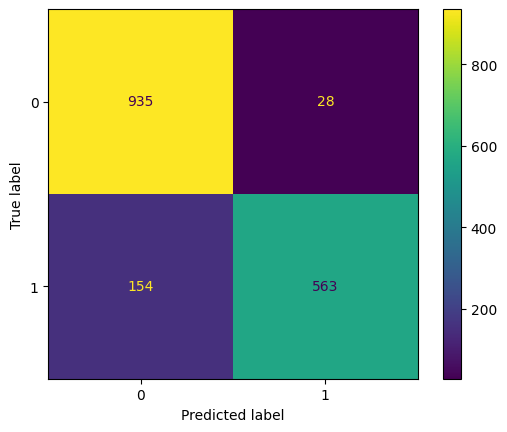

In [188]:
from sklearn.metrics import f1_score
knn_model = KNeighborsClassifier(n_neighbors= 19, weights= 'distance',p=1)
knn_model.fit(x_train_trf, y_train_trf)
y_pred = knn_model.predict(x_validate_trf)
accuracy_knn = accuracy_score(y_validate_trf, y_pred)
f1_knn = f1_score(y_validate_trf, y_pred)

print(f'accuracy: {accuracy_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
cm = confusion_matrix(y_validate_trf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

accuracy: 0.8923
F1 Score: 0.8609


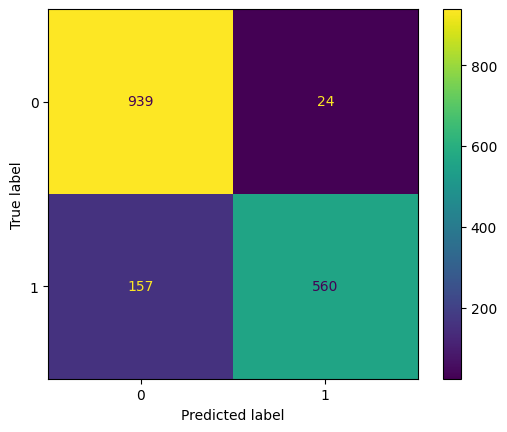

In [189]:
rf_model = RandomForestClassifier(random_state=42,n_estimators= 121, max_depth= 32, min_samples_split= 3)
rf_model.fit(x_train_trf, y_train_trf)
y_pred = rf_model.predict(x_validate_trf)
accuracy_rf = accuracy_score(y_validate_trf, y_pred)
f1_rf = f1_score(y_validate_trf, y_pred)

print(f'accuracy: {accuracy_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
cm = confusion_matrix(y_validate_trf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

accuracy: 0.8655
F1 Score: 0.8264


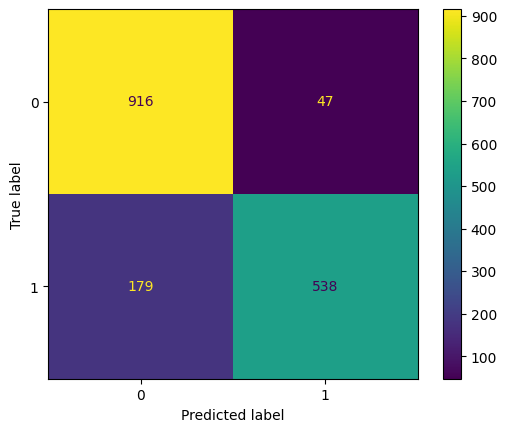

In [190]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train_trf, y_train_trf)
y_pred = xgb_classifier.predict(x_validate_trf)
accuracy_xgb = accuracy_score(y_validate_trf, y_pred)
f1_xgb = f1_score(y_validate_trf, y_pred)

print(f'accuracy: {accuracy_xgb:.4f}')
print(f'F1 Score: {f1_xgb:.4f}')
cm = confusion_matrix(y_validate_trf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

accuracy: 0.8387
F1 Score: 0.8090


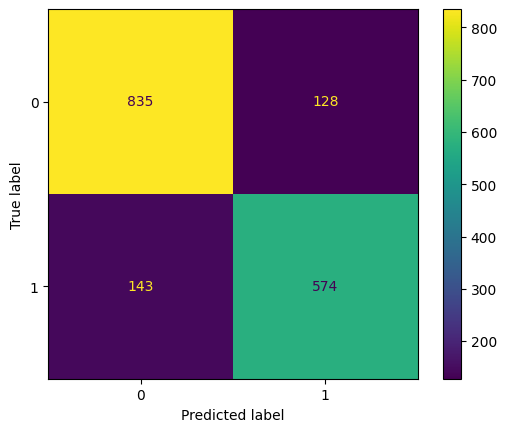

In [191]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_trf, y_train_trf)
y_pred = dt_model.predict(x_validate_trf)
accuracy_dt = accuracy_score(y_validate_trf, y_pred)
f1_dt = f1_score(y_validate_trf, y_pred)

print(f'accuracy: {accuracy_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
cm = confusion_matrix(y_validate_trf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [192]:
resultaten = [
    {'model': 'LogisticRegression', 'accuracy': accuracy_lg, 'f1_score': f1_lg},
    {'model': 'DecisionTree', 'accuracy': accuracy_dt, 'f1_score': f1_dt},
    {'model': 'RandomForestClassifier', 'accuracy': accuracy_rf, 'f1_score': f1_rf},
    {'model': 'KNeighborsClassifier', 'accuracy': accuracy_knn, 'f1_score': f1_knn},
    {'model': 'XGBClassifier', 'accuracy': accuracy_xgb, 'f1_score': f1_xgb}
]

In [193]:
df_resultaten = pd.DataFrame(resultaten)
df_resultaten_sorted = df_resultaten.sort_values(by='f1_score', ascending=False)
display(df_resultaten_sorted)


,model,accuracy,f1_score
2,RandomForestClassifier,0.892262,0.860876
3,KNeighborsClassifier,0.891667,0.860856
4,XGBClassifier,0.865476,0.826421
1,DecisionTree,0.838690,0.809020
0,LogisticRegression,0.850595,0.797744


RandomForest and KNN geven de beste scores -> testen op test-set

accuracy: 0.8817
F1 Score: 0.8480


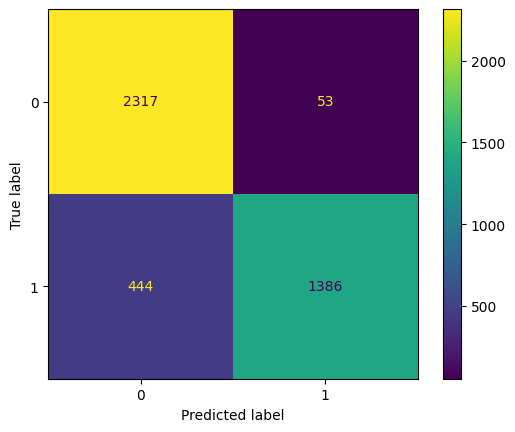

In [194]:
y_pred_test = rf_model.predict(x_test_trf)
accuracy_rf_test = accuracy_score(y_test_trf, y_pred_test)
f1_rf_test = f1_score(y_test_trf, y_pred_test)

print(f'accuracy: {accuracy_rf_test:.4f}')
print(f'F1 Score: {f1_rf_test:.4f}')
cm = confusion_matrix(y_test_trf, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

accuracy: 0.8812
F1 Score: 0.8481


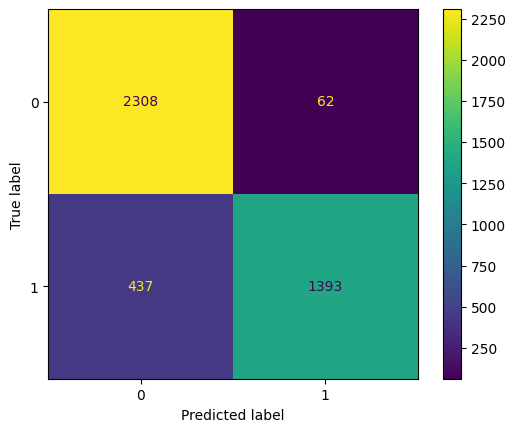

In [195]:
y_pred_test = knn_model.predict(x_test_trf)
accuracy_knn_test = accuracy_score(y_test_trf, y_pred_test)
f1_knn_test = f1_score(y_test_trf, y_pred_test)

print(f'accuracy: {accuracy_knn_test:.4f}')
print(f'F1 Score: {f1_knn_test:.4f}')
cm = confusion_matrix(y_test_trf, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Conclusie : De accuracy en F1-score van de modellen RandomForrest en KNN op de test-set zijn slechts iets lager dan op de validatieset. De modellen kunnen vrij betrouwbaar voorspellen of de wijn van middelmatig niveau is. De voorspelling dat de wijn niet van middelmatige kwaliteit is, is minder betrouwbaar. 

SVC

Ik heb ook nog een SVC model geprobeerd, maar dit geeft geen betere resultaten. PAS OP : het duurt lang om onderstaande cel te runnen (meer dan 8 minuten op mijn computer)

In [196]:
# Uitzoeken wat de beste parameters zijn voor de kernel


gamma_range = np.linspace(0.1, 1, 5)
C_range = np.linspace(0.1, 2, 6)
for gamma in gamma_range:
    for C in C_range:
        svm = SVC(kernel='rbf', gamma=gamma, C=C)
        svm.fit(x_train, y_train_trf)
        y_pred = svm.predict(x_test)
        print("Gamma:", gamma, "C:", C, "Accuracy:", accuracy_score(y_test_trf, y_pred))
        print("Classification Report:\n", classification_report(y_test_trf, y_pred))

Gamma: 0.1 C: 0.1 Accuracy: 0.645952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.99      0.76      2370
           1       0.96      0.19      0.32      1830

    accuracy                           0.65      4200
   macro avg       0.79      0.59      0.54      4200
weighted avg       0.77      0.65      0.57      4200

Gamma: 0.1 C: 0.48 Accuracy: 0.8154761904761905
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86      2370
           1       0.96      0.60      0.74      1830

    accuracy                           0.82      4200
   macro avg       0.86      0.79      0.80      4200
weighted avg       0.85      0.82      0.81      4200

Gamma: 0.1 C: 0.86 Accuracy: 0.8552380952380952
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      2370
           1       0.95

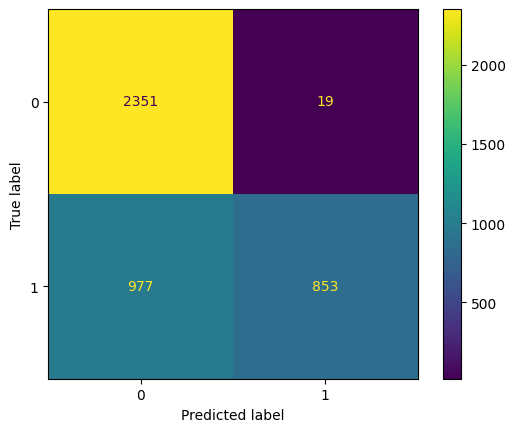

In [197]:
# de beste parameters zijn: gamma=0.55 en C=0.86
# een confusion matrix maken voor deze parameters
# Dit model is best goed: als wordt voorspeld dat de wijn goed is, is dat ook zo in 100% van de gevallen.
# Wel wordt bijna de helft van goede wijnen gemist
svm = SVC(kernel='rbf', gamma=0.55, C=0.86)
svm.fit(x_train, y_train_trf)
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test_trf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()